<a href="https://colab.research.google.com/github/Venugopal1407/Skillcraft-Intern/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download aryarishabh/hand-gesture-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/aryarishabh/hand-gesture-recognition-dataset
License(s): CC0-1.0


In [ ]:
!unzip /content/hand-gesture-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/4/46.jpg    
  inflating: train/train/4/460.jpg   
  inflating: train/train/4/461.jpg   
  inflating: train/train/4/462.jpg   
  inflating: train/train/4/463.jpg   
  inflating: train/train/4/464.jpg   
  inflating: train/train/4/465.jpg   
  inflating: train/train/4/466.jpg   
  inflating: train/train/4/467.jpg   
  inflating: train/train/4/468.jpg   
  inflating: train/train/4/469.jpg   
  inflating: train/train/4/47.jpg    
  inflating: train/train/4/470.jpg   
  inflating: train/train/4/471.jpg   
  inflating: train/train/4/472.jpg   
  inflating: train/train/4/473.jpg   
  inflating: train/train/4/474.jpg   
  inflating: train/train/4/475.jpg   
  inflating: train/train/4/476.jpg   
  inflating: train/train/4/477.jpg   
  inflating: train/train/4/478.jpg   
  inflating: train/train/4/479.jpg   
  inflating: train/train/4/48.jpg    
  inflating: train/train/4/480.jpg   
  inflating: train/train/4/481.jpg   

In [ ]:
import zipfile
import os

# Unzip the dataset
zip_path = '/content/hand-gesture-recognition-dataset.zip'
extract_path = '/content/hand_gesture_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Parameters
img_height = 64
img_width = 64
batch_size = 32

# Path to dataset
dataset_dir = '/content/hand_gesture_dataset'


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training Data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation Data
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 19200 images belonging to 2 classes.
Found 4800 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 171s 282ms/step - accuracy: 0.7459 - loss: 0.5610 - val_accuracy: 0.7358 - val_loss: 0.7758
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 209s 294ms/step - accuracy: 0.7844 - loss: 0.4503 - val_accuracy: 0.7379 - val_loss: 0.8456
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 165s 276ms/step - accuracy: 0.8118 - loss: 0.4010 - val_accuracy: 0.7069 - val_loss: 0.8449
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 166s 277ms/step - accuracy: 0.8459 - loss: 0.3460 - val_accuracy: 0.7008 - val_loss: 0.9486
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 196s 326ms/step - accuracy: 0.8584 - loss: 0.3192 - val_accuracy: 0.7306 - val_loss: 1.0726
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 172s 276ms/step - accuracy: 0.8651 - loss: 0.3031 - val_accuracy: 0.7373 - val_loss: 1.1678
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 164s 274ms/step - accuracy: 0.8765 - loss: 0.2810 - val_accuracy: 0.7246 - val_loss: 1.2777
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 166s 277ms/step - accuracy: 0.8835 -

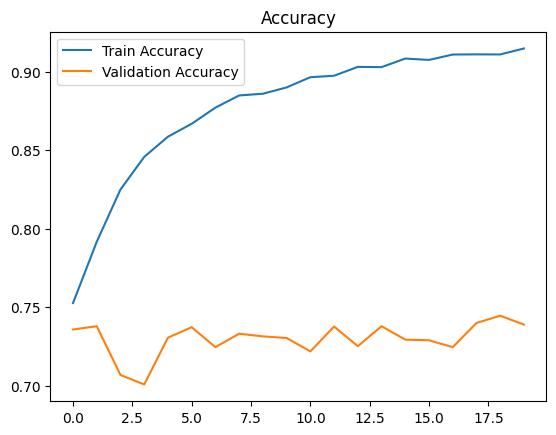

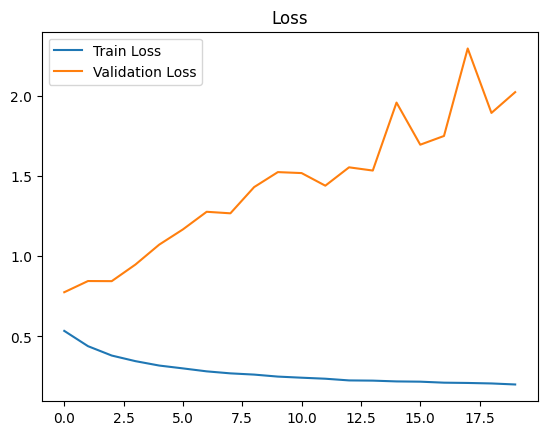

In [ ]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:
model.save('/content/hand_gesture_model.h5')
print("Model saved successfully!")


Model saved successfully!
